brownian


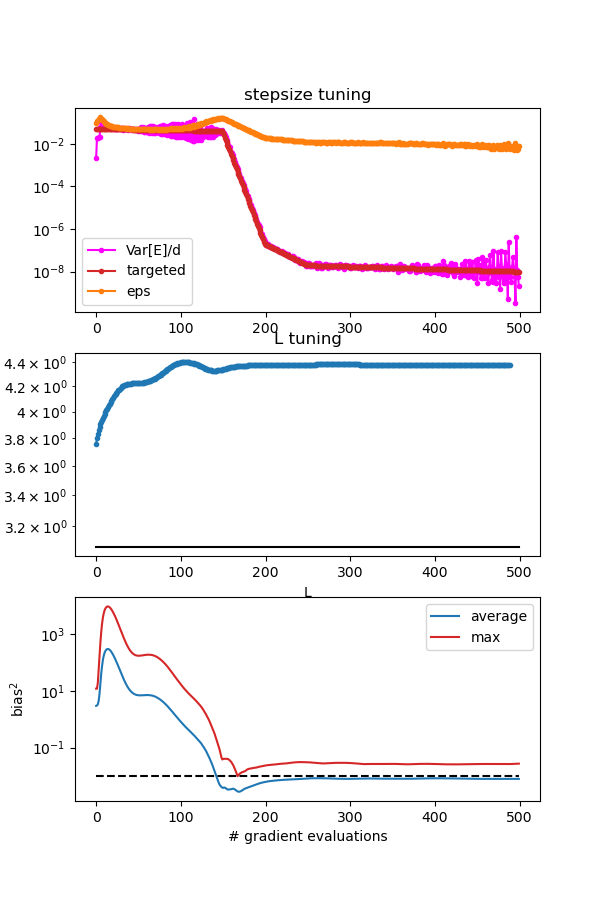

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display


targets = ['Banana', 'ICG', 'german_credit', 'brownian', 'IRT', 'SV']

for i in [3, ]:
    name = targets[i]
    print(name)
    display(Image(filename='plots/tst_ensemble/'+name+'.png'))
    #ICG, Brownian, SV

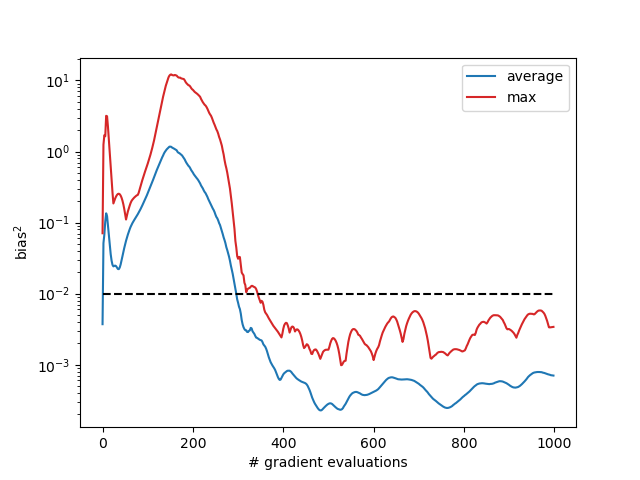

In [27]:

display(Image(filename='plots/tst_ensemble/'+targets[3]+'_pairs.png'))